# This is the Assignment 2 for the course **CS771** (2021-22 I)<br>
### ***Name*** : Moksh Shukla
### ***Roll No.*** : 180433

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time #to calculate time in Q1(e)

##Question 1

Here I have slightly modified the ```gradient_descent``` function: ```x = np.add(x,delta) ``` in place of ```x += delta``` and ```np.round(x,3)``` in place of ```round(x*1000)/1000``` to accomodate the function for ```np``` arrays which makes it usable for other parts as well.

In [4]:
def gradient_descent (gradient, init_,learn_rate, n_iter=1000, tol=1e-06):
  x = init_
  for _ in range(n_iter):
    delta = -learn_rate*gradient(x) 
    if np.all(np.abs(delta) <= tol):
      break 
    x = np.add(x,delta) 
    # x+=delta
  return np.round(x,3)
  # return round(x*1000)/1000

##Part(a)

i ) To find minima for $x^2 + 3x + 2$, I simply define a gradient function ```grad_f1``` which is passed to ```gradient_descent``` and it returns the value of $x$ at which minima occurs 

In [ ]:
# f1(x) = x^2 + 3x + 4
def grad_f1(val):
  x = val
  f_prime = 2*x + 3

  return f_prime

In [ ]:
f1_min = gradient_descent(grad_f1, 1, 0.1) #initial value = 1, learning  rate = 0.1
print("Minima Occurs at:" + str(f1_min)) #returns the value at which minima occurs for the function

Minima Occurs at:-1.5


ii ) To find minima for $x^4 - 3x^2 + 2x$, I simply define a gradient function ```grad_f2``` which is passed to ```gradient_descent``` and it returns the value of $x$ at which minima occurs. This function has multiple optima so a choice of good starting point determines whether we reach a local or global optima

In [ ]:
# f2(x) = x^4 - 3x^2 + 2x

def grad_f2(val):
  x = val
  f_prime = 4*x*x*x-6*x+2

  return f_prime

In [ ]:
f2_min = gradient_descent(grad_f2, 0, 0.02) #initial value = 0, learning  rate = 0.02
print("Minima Occurs at:" + str(f2_min)) #returns the value at which minima occurs for the given function

Minima Occurs at:-1.366


## Part(b)

We need to fit the following regression equation $$y = aX+b$$ <br>
So, for the above equation our ***gradient descent*** update steps for $a$ and $b$ are: $$a^{t+1} = a^t - \alpha \frac{1}{n}\sum_{i=1}^{n} ((y_{pred}^i - y^i)x^i)$$<br>
$$b^{t+1} = b^t - \alpha \frac{1}{n}\sum_{i=1}^{n} (y_{pred}^i - y^i)$$<br>
So the corresponding expressions for gradients are: ```grad_a```$ =  \frac{1}{n}\sum_{i=1}^{n} ((y_{pred}^i - y^i)x^i)$ ; ```grad_b``` = $\frac{1}{n}\sum_{i=1}^{n} (y_{pred}^i - y^i)$<br><br>
The following gradients are implemented in the function ```linearGrad``` which returns the gradients for parametres $a$ and $b$. Inside the function before calculating the gradient I always shuffle the complete data using ```np.random.choice```


In [26]:
# y = ax+b
def linearGrad(param):
  n = X.shape[0]
  np.random.seed(0)
  randIdx = np.random.choice(n, n) #using this I shuffle my complete data everytime
  X_gd = X[randIdx] #shuffled X
  y_gd = y[randIdx] #shuffled y
  a = param[0]
  b = param[1]
  ynew = a*X_gd + b
  grad_a = ((ynew-y_gd)*X_gd).mean()
  grad_b = (ynew-y_gd).mean()
  return np.array([grad_a, grad_b])

## Part(c)

In [5]:
np.random.seed(0)
X = 2.5*np.random.randn(10000) + 1.5
res = 1.5*np.random.randn(10000)
y = 2 + 0.3*X + res

Here, I test the ```gradient_descent``` for our simulated data using ```linearGrad``` as our gradient calculation function. I use ```[3.5, 2.5]``` as the starting values and ```0.05``` as the optimum learning rate. As a result I get the fitted equation as $y = 0.292x+2.023$ which is very close to the ideal $y = 0.3x+2$ .<br><br>
The code cell below also calculates the time taken by ```gradient_descent``` to run using the ```time``` module of python

In [176]:
begin = time.time()
reg_params = gradient_descent(linearGrad, init_=np.array([3.5,2.5]), learn_rate=0.05)
print('y = {:.3f}*X + {:.3f}'.format(reg_params[0], reg_params[1]))
end = time.time()
print(f"Total runtime of the program is {end - begin}")

y = 0.292*X + 2.023
Total runtime of the program is 0.09563922882080078


## Part(d): Minibatch SGD

Here, I test the ```gradient_descent``` for our simulated data using ```minibatchSGD_grad``` as our gradient calculation function. I use ```[3.5, 2.5]``` as the starting values and ```0.05``` as the optimum learning rate. As a result I get the fitted equation as $y = 0.301x+2.047$ (get this value when you uncomment the seed line ```np.random.seed(1)``` inside the function) which is very close to the ideal $y = 0.3x+2$ .<br><br>
The code cell below also calculates the time taken by ```gradient_descent``` to run using the ```time``` module of python

In [24]:
def miniBatchSGD_grad(param):
  n = X.shape[0]
  #np.random.seed(1)
  randIdx = np.random.choice(n, B) #randomly choose B numbers out of n possible values, where B = batchSize
  X_mini = X[randIdx] #select values of X based on randomly chosen values previously
  y_mini = y[randIdx] #select values of y based on randomly chosen values previously
  a = param[0]
  b = param[1]
  ynew = a*X_mini + b
  grad_a = ((ynew-y_mini)*X_mini).mean() #gradient of a
  grad_b = (ynew-y_mini).mean()  #gradient of b
  return np.array([grad_a, grad_b])

In [166]:
begin = time.time()
B = 256 #B = batchSize
reg_params = gradient_descent(miniBatchSGD_grad, init_= np.array([3.5,2.5]), learn_rate=0.05) #initial value = [3.5, 2.5], learning rate = 0.05
print('y = {:.3f}*X + {:.3f}'.format(reg_params[0], reg_params[1]))
end = time.time()
print(f"Total runtime of the program is {end - begin}")

y = 0.301*X + 2.047
Total runtime of the program is 0.0227506160736084


## Part(e)

minBatch SGD becomes SGD when Batch Size = 1

In [32]:
## Stochastic Gradient Descent
begin = time.time()
B = 1 #B = batchSize
reg_params = gradient_descent(miniBatchSGD_grad, init_= np.array([3.5,2.5]), learn_rate=0.05) #initial value = [3.5, 2.5], learning rate = 0.05
end = time.time()
print(f"Total runtime of the program is {end - begin}")

Total runtime of the program is 0.003300905227661133


From Part(c), we find the runtime for ```gradient_descent``` to be ***0.096 secs***, where as for ```miniBatchSGD``` we find the runtime to be ***0.023 secs***. Thus **miniBatchSGD** performs faster than normal gradient descent, which is expected since gradient descent uses all points to calculate gradient for the update step.<br><br>
SGD as well as miniBatch SGD both perform better in terms of time as compared to Gradient Descent which can be seen in Plot 2 below.<br><br>
Order of Performance just on the basis of time: Gradient Descent > miniBatchSGD > SGD

#### Computation of Optimum Mini Batch Size

In [117]:
batch_sizes = [] #creating a list of different batch sizes to test for optimum batch size
i = 0
while(2**i < 10000):
  batch_sizes.append(2**i)
  i+=1
batch_sizes.append(10000)
batch_sizes # using batch sizes in the powers of 2

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 10000]

In [173]:
loss_lst = [] #list to store training loss for all minibatch sizes
runTime = [] #list to store total time taken for all minibatch sizes
bIter = 7    #no. of iterations used to calculate avg loss and avg time taken for a particular batch size
learn_rate = 0.05
n_iter = 1000

def loss(param): #loss function to calculate total loss for a particular param
  n = X.shape[0]
  a = param[0]
  b = param[1]
  ynew = a*X + b
  regLoss = np.dot((ynew- y).T,(ynew - y))/n ## ||(ynew-y)||^2
  return regLoss

for B in batch_sizes:
  lossCurr = 0
  timeCurr = 0
  for _ in range(bIter):
    init_ =  [3.5,2.5] #initialisation for param
    start_time = time.time()
    param = gradient_descent(miniBatchSGD_grad,init_,learn_rate,n_iter)
    end_time = time.time()
    loss_temp = loss(param) #to store loss value at a single iteration
    lossCurr+=loss_temp #stores loss value for all iterations by adding them up
    timeCurr+=(end_time-start_time)

  loss_lst.append(lossCurr/bIter)
  runTime.append(timeCurr/bIter)  

#### **Plot of Training Loss v/s $\log_2$(batch_size) for Minibatch SGD**<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; Plot 1

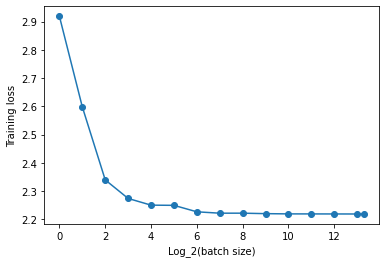

In [174]:
plt.xlabel("Log_2(batch size)")
plt.ylabel("Training loss")
plt.plot(np.log2(batch_sizes),loss_lst,marker='o')
plt.show()

#### **Plot of Time Taken v/s $\log_2$(batch_size) for Minibatch SGD**<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; Plot 2

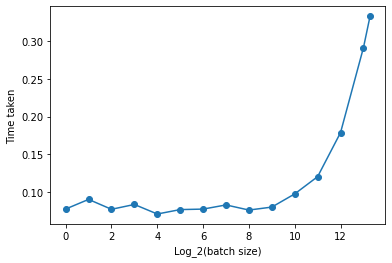

In [175]:
plt.xlabel("Log_2(batch size)")
plt.ylabel("Time taken")
plt.plot(np.log2(batch_sizes),runTime,marker = 'o')
plt.show()

### Conclusion:
As we can see from **plot1** that with increase in batch size the training loss drops which afterwards gets saturated. This is expected as when the gradient update step sees more data, loss is bound to decrease.<br>
We can also see from **plot2** that with increase in batch size the time taken for training increases. This is also expected since more the data points our update step sees more will be the time involved in computations.<br>
Hence, there exists an optimum miniBatch Size.<br>
So, our choice of **Optimum miniBatch Size** will be based on both the 2 parameters: *Training Loss* as well as *Time Taken to Train*.<br>
Based on this when we observe both the plots we find that optimum of both the decided parameters occur when we have $\log_2miniBatch = 8$ i.e. $miniBatchSize = 2^8 = 256$ <br><br>
Hence, we can conclude that *approximately* optimum miniBatch Size is ***256***


##  Q2 Part(a)

Using Simple Conditional Probability:<br><br>
$P(Cold = True, Fever = True) = P(Fever = True|Cold = True) \times P(Cold = True)$ <br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$ = (0.307)\times(0.02) = 0.00614$

## Q2 Part (b)

#### **We need to calculate $P(Cold=True|Cough=True)$ which is given (Using Bayes Theorem) by:** <br><br>
$$P(Cold=True|Cough=True) = \frac{P(Cough=True|Cold=True)\times P(Cold=True)}{P(Cough=True)}$$<br>
#### **To calculate the required probability we need the values of the 3 terms in our expression above. We already know $P(Cold=True)=0.02$ from the Bayesian Tables in the problem. Now first let us calculate $P(Cough=True)$**<br><br>
#### **Applying Law of Total Probability:**

Eq1.) $P(Cough=True) = P(Cough=True|Cold=True, LungDisease=True)*P(Cold=True)*P(LungDisease=True)+P(Cough=True|Cold=False, LungDisease=True)*P(Cold=False)*P(LungDisease=True)+P(Cough=True|Cold=True, LungDisease=False)*P(Cold=True)*P(LungDisease=False)+P(Cough=True|Cold=False, LungDisease=False)*P(Cold=False)*P(LungDisease=False)$<br><br>
#### **The Required Conditional Probabilities and $P(Cold=True)$ & $P(Cold=False)$ can be found from the tables. For solving the expression above we need $P(Lung Disease=True)$ & $P(Lung Disease=False)$**<br>
$P(LungDisease=True) = P(LungDisease=True|Smokes=True)P(Smokes=True) + P(LungDisease=True|Smokes=False)P(Smokes=False)$<br><br>
$P(LungDisease=True) = 0.1009*0.2+0.001*0.8 = 0.02098$<br><br>
$P(LungDisease=False)=1-P(LungDisease=True)$<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;$=1-0.02098 = 0.9702$<br><br>
#### **Now Plugging in the values in *Eq. 1* of $P(Cough=True)$ we get:**

$P(Cough=True) = 0.7525*0.02*0.02098+0.505*0.98*0.02098+0.505*0.02*0.9702+$<br>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;$0.01*0.98*0.97902$<br>
$P(Cough=True) = 0.0302$<br><br>

#### **Now let us calculate the value of $P(Cough=True|Cold=True)$:**<br>
$P(Cough=True|Cold=True) = P(Cough=True|Cold=True, LungDisease=True)*P(LungDisease=True) + P(Cough=True|Cold=True, LungDisease=False)*P(LungDisease=False)$<br><br>
$P(Cough=True|Cold=True) = 0.7525*0.02098+0.505*0.97902$<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp;$=0.5102$<br>
<br>
#### **Finally calculating the required probability**
$P(Cold=True|Cough=True) = \frac{P(Cough=True|Cold=True)\times P(Cold=True)}{P(Cough=True)}$<br><br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp;$=\frac{0.5102\times0.02}{0.0302} = 0.3381$






## Q3: Finding MLE for multinomial distribution

Let $X$ be a Random Variable following multinomial distribution in which $x_i$ is the number of success of the $i^{th}$ category for $n$ random draws, and $p_i$ is the probability of success of the $i^{th}$ category. Then, $$P(X=x, n, \mathbf{p}) = n! \prod_{i=1}^{k} \frac{p_{i}^{x_i}}{x_i !}$$<br>
where, <br> 
$$\sum_{i=1}^{k} p_i = 1$$ <br>
For the given multinomial distribution log-likelihood can be written as:$$l(\mathbf{p}) = \log(n! \prod_{i=1}^{k} \frac{p_{i}^{x_i}}{x_i !})$$<br>
$$l(\mathbf{p})=\log n! + \sum_{i=1}^{k} x_i \log p_i - \sum_{i=1}^{k} \log x_i!$$<br>

For MLE estimate of $\mathbf{p}$, assuming $n$ is known, we solve the following optimization problem:$$\max_{\mathbf{p}}l(\mathbf{p},n)$$ <br>
such that $$\sum_{k=1}^{K}p_i = 1$$

Maximizing the log-likelihood is a constrained optimization problem and we use *Lagrangian* to solve this.$$\mathcal{L}(\mathbf{p},\lambda) = l(\mathbf{p}) + \lambda(1-\sum_{i=1}^{k} p_i)$$<br>
Solving: $$\frac{\partial \mathcal{L}}{\partial p_i} = 0$$<br>
$$\frac{\partial \mathcal{L}}{\partial p_i} = \frac{\partial l}{\partial p_i}+\frac{\partial (\lambda(1-\sum_{i=1}^{k} p_i))}{\partial p_i} = 0$$<br>
$$\frac{\partial l}{\partial p_i} = 0 + \frac{\partial \sum_{i=1}^{k} x_i \log p_i }{\partial p_i} + 0$$<br>
$$\frac{\partial \mathcal{L}}{\partial p_i} = \frac{\partial \sum_{i=1}^{k} x_i \log p_i }{\partial p_i} - \lambda\partial\frac{ \sum_{i=1}^{k} p_i }{\partial p_i} = 0$$<br>
$$ \frac{x_i}{p_i} - \lambda = 0 $$<br>
$$p_i = \frac{x_i}{\lambda}$$<br>
Since given our constraint, $$\sum_{i=1}^{k} p_i = 1$$<br>
we have, $$\sum_{i=1}^{k} \frac{x_i}{\lambda} = 1$$<br>
$$\lambda = \sum_{i=1}^{k} x_i$$<br>
$$\lambda = n$$<br>
Therefore our MLE estimate:$$\hat{p_i} = \frac{x_i}{n}$$<br>
$$\hat{\mathbf{p}} = [\frac{x_1}{n}, \frac{x_2}{n}....\frac{x_k}{n}]$$

